In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [2]:
with open("the-verdict.txt" , 'r') as file:
    data = file.read()
# data = input("Enter your prompt here: ")

In [3]:
print(len(data))

20479


In [4]:
split_text = re.split(r'([,.<>/!@#$%^&*():;]|--|\s)',data)

In [5]:
#This a for loop for separating the text. And below is list comprehension

# result = []
# for item in text:
#     if item.strip():
#         result.append(item)
    
# result

In [6]:

# This is a word based tokenization algorithm. This tokenize for each word.....

result = [item.strip() for item in split_text if item.strip()]
print(result)

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in', 'the', 'height', 'of', 'his', 'glory', ',', 'he', 'had', 'dropped', 'his', 'painting', ',', 'married', 'a', 'rich', 'widow', ',', 'and', 'established', 'himself', 'in', 'a', 'villa', 'on', 'the', 'Riviera', '.', '(', 'Though', 'I', 'rather', 'thought', 'it', 'would', 'have', 'been', 'Rome', 'or', 'Florence', '.', ')', '"The', 'height', 'of', 'his', 'glory"', '--', 'that', 'was', 'what', 'the', 'women', 'called', 'it', '.', 'I', 'can', 'hear', 'Mrs', '.', 'Gideon', 'Thwing', '--', 'his', 'last', 'Chicago', 'sitter', '--', 'deploring', 'his', 'unaccountable', 'abdication', '.', '"Of', 'course', "it's", 'going', 'to', 'send', 'the', 'value', 'of', 'my', 'picture', "'way", 'up', ';', 'but', 'I', "don't", 'think', 'of', 'that', ',', 'Mr', '.', 'Rickham', '--', '

In [7]:
len(result)

4364

In [8]:
words = sorted(set(result))
print(len(words))

1209


In [9]:
token_id = {token:i for i,token in enumerate(words)}
print(token_id)

{'!': 0, '"': 1, '"Ah': 2, '"Be': 3, '"Begin': 4, '"By': 5, '"Come': 6, '"Destroyed': 7, '"Don\'t': 8, '"Gisburns"': 9, '"Grindles': 10, '"Hang': 11, '"Has': 12, '"How': 13, '"I': 14, '"I\'d': 15, '"If': 16, '"It': 17, '"It\'s': 18, '"Jack': 19, '"Money\'s': 20, '"Moon-dancers"': 21, '"Mr': 22, '"Mrs': 23, '"My': 24, '"Never': 25, '"Of': 26, '"Oh': 27, '"Once': 28, '"Only': 29, '"Or': 30, '"That': 31, '"The': 32, '"Then': 33, '"There': 34, '"This': 35, '"We': 36, '"Well': 37, '"What': 38, '"When': 39, '"Why': 40, '"Yes': 41, '"You': 42, '"but': 43, '"deadening': 44, '"dragged': 45, '"effects"': 46, '"interesting"': 47, '"lift': 48, '"obituary"': 49, '"strongest': 50, '"strongly"': 51, '"sweetly"': 52, "'": 53, "'Are": 54, "'It's": 55, "'coming'": 56, "'done'": 57, "'subject": 58, "'technique'": 59, "'way": 60, '(': 61, ')': 62, ',': 63, '--': 64, '.': 65, ':': 66, ';': 67, 'A': 68, 'Among': 69, 'And': 70, 'Arrt': 71, 'As': 72, 'At': 73, 'Burlington': 74, 'But': 75, 'By': 76, 'Carlo': 7

In [10]:
import importlib
import tiktoken

print("tik version = ", importlib.metadata.version("tiktoken"))

tik version =  0.12.0


In [11]:
tokenizer = tiktoken.get_encoding("gpt2")
# Byte Pair Encoding ---------- BPE is done using tiktoken library 

In [12]:
text = ("Helllo, do you like tea? <|endoftext|> In the sunlight terraces"
        "of someUnknownPlace.")

interger = tokenizer.encode(text, allowed_special={"<|endoftext|>"})

print(interger)

[28254, 5439, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 19606, 8812, 2114, 1659, 617, 20035, 27271, 13]


In [13]:
strings = tokenizer.decode(interger)
print(strings)

Helllo, do you like tea? <|endoftext|> In the sunlight terracesof someUnknownPlace.


In [14]:
# input-target pair
with open("the-verdict.txt" , 'r') as file:
    data = file.read()

In [15]:
enc_text = tokenizer.encode(data)
print(len(enc_text))

5145


In [16]:
sample_context = 20
for i in range(1, sample_context+1):
    context = enc_text[:i]
    desire = enc_text[i]

    print(tokenizer.decode(context), "------->", tokenizer.decode([desire]))

I ------->  H
I H -------> AD
I HAD ------->  always
I HAD always ------->  thought
I HAD always thought ------->  Jack
I HAD always thought Jack ------->  G
I HAD always thought Jack G -------> is
I HAD always thought Jack Gis -------> burn
I HAD always thought Jack Gisburn ------->  rather
I HAD always thought Jack Gisburn rather ------->  a
I HAD always thought Jack Gisburn rather a ------->  cheap
I HAD always thought Jack Gisburn rather a cheap ------->  genius
I HAD always thought Jack Gisburn rather a cheap genius -------> --
I HAD always thought Jack Gisburn rather a cheap genius-- -------> though
I HAD always thought Jack Gisburn rather a cheap genius--though ------->  a
I HAD always thought Jack Gisburn rather a cheap genius--though a ------->  good
I HAD always thought Jack Gisburn rather a cheap genius--though a good ------->  fellow
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow ------->  enough
I HAD always thought Jack Gisburn rather a chea

In [17]:
# Creating a input output pair

from torch.utils.data import Dataset, DataLoader
import torch

class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_len, stride):
        self.input_ids = []
        self.target_ids = []

        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})
    # Using sliding window to chuck block into overlapping sequence of max_len 
        for i in range (0, len(token_ids)-max_len, stride):
            input_chuck = token_ids[i : i + max_len]
            target_chuck = token_ids[i + 1 : i + max_len + 1]
            self.input_ids.append(torch.tensor(input_chuck))
            self.target_ids.append(torch.tensor(target_chuck))

    def __len__(self):
        return len(self.input_ids)
    
    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]
    

def create_dataloader(txt, batch_size = 4, max_len = 256, stride = 128, shuffle = True, drop_last = True, num_workers = 0):
    dataset = GPTDatasetV1(txt, tokenizer, max_len, stride) #create dataset
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle = shuffle, drop_last = drop_last, num_workers = num_workers)
    return dataloader


#with open("the-verdict.txt" , 'r') as file:
#    data = file.read()      Run this to get the data


dataloader = create_dataloader(data, batch_size=1, max_len=4, stride=1, shuffle=False)

data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)

# [tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])] ----->> it gives input_tensor and output_tensor

[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


In [18]:
# Creatiing Token Embedding

input_ids = torch.tensor([2,3,5,1])

In [19]:
vocab_size = 50257
output_dim = 256

torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim) # Here number of rows is equal to vocab_size

print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.3035,  ...,  1.3337,  0.0771, -0.0522],
        [ 0.2386,  0.1411, -1.3354,  ..., -0.0315, -1.0640,  0.9417],
        [-1.3152, -0.0677, -0.1350,  ..., -0.3181, -1.3936,  0.5226],
        ...,
        [ 0.5871, -0.0572, -1.1628,  ..., -0.6887, -0.7364,  0.4479],
        [ 0.4438,  0.7411,  1.1263,  ...,  1.2091,  0.6781,  0.3331],
        [-0.2537,  0.1446,  0.7203,  ..., -0.2134,  0.2144,  0.3006]],
       requires_grad=True)


In [20]:
max_len = 4
dataloader = create_dataloader(data, batch_size=8, max_len=max_len, stride=max_len, shuffle=False)
data_iter = iter(dataloader)
inputs, targets = next(data_iter)

print("Token Id : \n", inputs)
print("Input Shape : ", inputs.shape)

Token Id : 
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])
Input Shape :  torch.Size([8, 4])


In [21]:
token_embedding = embedding_layer(inputs)
print(token_embedding.shape) # This will give 3 dimensional matrix which formed by embedding vector for all the 8*4 so output is ------>> 8*4*256

torch.Size([8, 4, 256])


In [22]:
# Create another embedding layer for positional encoding
# Here the number of row is context_length
context_length = max_len
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim) # This creates the embedding layer for positional  encoding

pos_embedding  = pos_embedding_layer(torch.arange(max_len))
print(pos_embedding.shape)

# This encodes the data to positional encoding to form size of 4*256
# Why we need to encode to get 4*256? ----  Because we are encoding positional encode and we want to know which position does input present
# So we get 4*256 

torch.Size([4, 256])


In [23]:
input_embedding = token_embedding + pos_embedding
print(input_embedding.shape)

# As total embedding of positional embedding is addidtion of token embedding and unquie positional embedding

torch.Size([8, 4, 256])


In [24]:
# Implementing simple attention mechanism
import torch
input_sam = torch.tensor(
    [[0.43, 0.15, 0.89],   #your   (x^1)
    [0.55, 0.87, 0.66],    #journey (x^2)
    [0.57, 0.85, 0.64],    #starts  (x^3)
    [0.22, 0.58, 0.33],    #with  (x^4)
    [0.77, 0.25, 0.10],    #one (x^5)
    [0.05, 0.80, 0.55]])   #step (x^6)

In [ ]:
# Just for Visualizing the attention of words in 3D graph
# not necessary to use. 

# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# # corresponding words

# words_sam = ['Your','journey', 'starts', 'with', 'one', 'step']

# # Extract x, y, z coordinates
# x_coords = input_sam[: , 0].numpy()
# y_coords = input_sam[: , 1].numpy()
# z_coords = input_sam[: , 2].numpy()

# # creating 3D plot
# fig = plt.Figure()
# ax = fig.add_subplot(111, projection='3d')

# for x,y,z,word in zip(x_coords,y_coords, z_coords, words_sam):
#     ax.scatter(x,y,z)
#     ax.text(x,y,z,word, fontsize = 10)

# ax.set_xlabel("x")
# ax.set_ylabel("y")
# ax.set_zlabel("z")

# plt.title("3D plot of word Embedding")
# plt.show()

In [26]:
# Attention Score with only 2nd element
query = input_sam[1]
attn_score_2 = torch.empty(input_sam.shape[0])
for i,x_i in enumerate(input_sam):
    attn_score_2[i] = torch.dot(x_i,query) # dot product (transpose not necessary)

print(attn_score_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


In [27]:
# normalization of attention score

attn_weight_2_tmp = attn_score_2/attn_score_2.sum()

print("Attention weights : ", attn_weight_2_tmp)
print("Sum : ", attn_weight_2_tmp.sum())

Attention weights :  tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum :  tensor(1.0000)


In [28]:
# Using Navie Softmax for normalization

def softmax_naive(x):
    return torch.exp(x)/torch.exp(x).sum(dim=0)

attn_weight_2_naive = softmax_naive(attn_score_2)

print("Attention weights : ", attn_weight_2_naive)
print("Sum : ", attn_weight_2_naive.sum())

Attention weights :  tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum :  tensor(1.)


In [29]:
# Pytorch implementation of softmax

attn_weight_2 = torch.softmax(attn_score_2, dim=0) # Attention weights
print("Attention weights : ", attn_weight_2)
print("Sum : ", attn_weight_2.sum())

# Naive softmax may encounter numerical instability problems such as overflow and underflow
# It is always advisable to use Pytorch softmax

Attention weights :  tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum :  tensor(1.)


In [30]:
# context vector implementation
query = input_sam[1]

context_vector = torch.zeros(query.shape)

for i, x_i in enumerate(input_sam):
    context_vector += attn_weight_2[i]*x_i

print(context_vector)

tensor([0.4419, 0.6515, 0.5683])


In [31]:
# Efficient way for attention score

attn_score = input_sam @ input_sam.T # It does dot product by multiplying input*input(transpose)
print(attn_score)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [32]:
attn_weight = torch.softmax(attn_score, dim=-1) # Attention weight for all the elements
print(attn_weight)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


In [33]:
all_context_vectors = attn_weight @ input_sam # All elements context vectors
print(all_context_vectors)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


In [34]:
# self attention mechanism with query key and value

x_2 = input_sam[1]
d_in = input_sam.shape[1]
d_out = 2

torch.manual_seed(123)
w_query = torch.nn.Parameter(torch.rand(d_in,d_out), requires_grad=False)
w_key = torch.nn.Parameter(torch.rand(d_in,d_out), requires_grad=False)
w_value = torch.nn.Parameter(torch.rand(d_in,d_out), requires_grad=False)

print(w_query,"\n")
print(w_key,"\n")
print(w_value,"\n")

Parameter containing:
tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]]) 

Parameter containing:
tensor([[0.1366, 0.1025],
        [0.1841, 0.7264],
        [0.3153, 0.6871]]) 

Parameter containing:
tensor([[0.0756, 0.1966],
        [0.3164, 0.4017],
        [0.1186, 0.8274]]) 



In [35]:
# Query Key Value for input_sam[1]

query_2 = x_2 @ w_query
key_2 = x_2 @ w_key
value_2 = x_2 @ w_value

print(query_2,"\n")
print(key_2,"\n")
print(value_2,"\n")


tensor([0.4306, 1.4551]) 

tensor([0.4433, 1.1419]) 

tensor([0.3951, 1.0037]) 



In [36]:
# Query Key Value using input_sam

query= input_sam @ w_query
key = input_sam @ w_key
value = input_sam @ w_value

print(query,"\n")
print(key,"\n")
print(value,"\n")

tensor([[0.2309, 1.0966],
        [0.4306, 1.4551],
        [0.4300, 1.4343],
        [0.2355, 0.7990],
        [0.2983, 0.6565],
        [0.2568, 1.0533]]) 

tensor([[0.3669, 0.7646],
        [0.4433, 1.1419],
        [0.4361, 1.1156],
        [0.2408, 0.6706],
        [0.1827, 0.3292],
        [0.3275, 0.9642]]) 

tensor([[0.1855, 0.8812],
        [0.3951, 1.0037],
        [0.3879, 0.9831],
        [0.2393, 0.5493],
        [0.1492, 0.3346],
        [0.3221, 0.7863]]) 



In [37]:
key_2 = key[1]
attn_score_22 = query_2.dot(key_2)
print("Attention score 22 \n",attn_score_22,"\n")

attn_score_2 = query_2 @ key.T # All attention score for given query   Here query is input_sam[2]
print("Attention score 2 \n",attn_score_2,"\n")

attn_score = query @ key.T # omega
print("Attention score \n", attn_score)

Attention score 22 
 tensor(1.8524) 

Attention score 2 
 tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440]) 

Attention score 
 tensor([[0.9231, 1.3545, 1.3241, 0.7910, 0.4032, 1.1330],
        [1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440],
        [1.2544, 1.8284, 1.7877, 1.0654, 0.5508, 1.5238],
        [0.6973, 1.0167, 0.9941, 0.5925, 0.3061, 0.8475],
        [0.6114, 0.8819, 0.8626, 0.5121, 0.2707, 0.7307],
        [0.8995, 1.3165, 1.2871, 0.7682, 0.3937, 1.0996]])


In [38]:
d_k = key.shape[-1]
attn_weights_2 = torch.softmax(attn_score_2/ d_k**0.5, dim=-1)
print(attn_weights_2)
print(d_k) 

tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])
2


In [39]:
# sample context vector with weights, values and keys
context_vec_2 = attn_weight_2 @ value 
print(context_vec_2)

tensor([0.3069, 0.8188])


In [40]:
# Modular self attention implementation for full input

import torch.nn as nn


class SelfAttention_v1(nn.Module):
    def __init__(self, d_in, d_out):
        super().__init__()
        self.w_query = nn.Parameter(torch.rand(d_in, d_out))
        self.w_key = nn.Parameter(torch.rand(d_in, d_out))
        self.w_value = nn.Parameter(torch.rand(d_in, d_out))

    def forward(self,x):
        key = x @ self.w_key    
        query = x @ self.w_query
        value = x @ self.w_value

        attn_scores = query @ key.T
        attn_weights = torch.softmax(attn_scores / key.shape[-1]**0.5, dim=-1)

        context_vec = attn_weights @ value
        return context_vec
    
torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in, d_out)       # This is the context vector of input_sam
print(sa_v1(input_sam))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


In [41]:
# Enhanced version of self attention 

import torch.nn as nn

class SelfAttention_v2(nn.Module):
    def __init__(self, d_in, d_out, qkv_bias = False):
        super().__init__()
        self.w_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.w_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.w_value = nn.Linear(d_in, d_out, bias=qkv_bias)

    def forward(self,x):
        key =  self.w_key(x)    
        query = self.w_query(x)
        value = self.w_value(x) 

        attn_scores = query @ key.T
        attn_weights = torch.softmax(attn_scores / key.shape[-1]**0.5, dim=-1)

        context_vec = attn_weights @ value
        return context_vec
    
torch.manual_seed(789)
sa_v2 = SelfAttention_v2(d_in, d_out)       # This is the context vector of input_sam in an enhanced way
print(sa_v2(input_sam)) 

# version 1 and version 2 are completely different because they both use different initialization
# version 1 ---> nn.Parameter        version 2 ---> nn.Linear

tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)


In [42]:
queries = sa_v2.w_query(input_sam)
keys = sa_v2.w_key(input_sam)
attention_score = queries @ keys.T
attention_weights = torch.softmax(attention_score/keys.shape[-1]**0.5, dim=1)
print(attention_weights)

tensor([[0.1921, 0.1646, 0.1652, 0.1550, 0.1721, 0.1510],
        [0.2041, 0.1659, 0.1662, 0.1496, 0.1665, 0.1477],
        [0.2036, 0.1659, 0.1662, 0.1498, 0.1664, 0.1480],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.1661, 0.1564],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.1585],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


In [43]:
context_length = attention_score.shape[0]
mask_simple = torch.tril(torch.ones(context_length, context_length)) # tril gives lower triangular matrix    triu gives upper triangular matrix
print(mask_simple,"\n")

masked_simple = attention_weights * mask_simple
print(masked_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]]) 

tensor([[0.1921, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2041, 0.1659, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2036, 0.1659, 0.1662, 0.0000, 0.0000, 0.0000],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.0000, 0.0000],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<MulBackward0>)


In [44]:
# normalizing masked_simple to make the sum of rows is equal to 1
row_sum = masked_simple.sum(dim=1, keepdim=True)
masked_simple_normalize = masked_simple/row_sum
print(masked_simple_normalize)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<DivBackward0>)


In [45]:
# Efficient masking
mask = torch.triu(torch.ones(context_length, context_length),diagonal=1)
masked = attention_score.masked_fill(mask.bool(), -torch.inf)
print("Efficiently Masked \n",masked, "\n")  # It gives masked matrix

attention_weights_eff = torch.softmax(masked/key.shape[-1]**0.5,dim=1)
print("Efficiennt attention weight after masked \n", attention_weights_eff) # Softmax after masked will give us normalized attention weight matrix

Efficiently Masked 
 tensor([[0.2899,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4656, 0.1723,   -inf,   -inf,   -inf,   -inf],
        [0.4594, 0.1703, 0.1731,   -inf,   -inf,   -inf],
        [0.2642, 0.1024, 0.1036, 0.0186,   -inf,   -inf],
        [0.2183, 0.0874, 0.0882, 0.0177, 0.0786,   -inf],
        [0.3408, 0.1270, 0.1290, 0.0198, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>) 

Efficiennt attention weight after masked 
 tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


In [46]:
# Dropout for reducing thw lazy neurons 
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5)
# example = torch.ones(6,6)  example
# print(dropout(example))
print(dropout(attention_weights_eff))

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.7599, 0.6194, 0.6206, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.4921, 0.4925, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3966, 0.0000, 0.3775, 0.0000, 0.0000],
        [0.0000, 0.3327, 0.3331, 0.3084, 0.3331, 0.0000]],
       grad_fn=<MulBackward0>)


In [47]:
# Implementation of causal mechanism 

class CausalAttention(nn.Module):
    def __init__(self,d_in, d_out, context_length, dropout, qkv_bias = False):
        super().__init__()
        self.d_out = d_out
        self.w_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.w_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.w_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.dropout = nn.Dropout(dropout)
        self.register_buffer('mask', torch.triu(torch.ones(context_length, context_length),diagonal=1))

    def forward(self, x):
        b, num_token, d_in = x.shape
        key =  self.w_key(x)    
        query = self.w_query(x)
        value = self.w_value(x) 

        attn_scores = query @ key.transpose(1,2)
        attn_score.masked_fill(self.mask.bool() [:num_token, :num_token], -torch.inf)
        attn_weights = torch.softmax(attn_scores / key.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)
        
        context_vector_causal = attn_weights @ value
        return context_vector_causal

batch = torch.stack((input_sam, input_sam), dim=0) # shape of batch is [2,6,3]
torch.manual_seed(123)
context_length = batch.shape[1]
causalAttention = CausalAttention(d_in, d_out, context_length, 0.0)
context_vec_causal = causalAttention(batch)
print("Shape of context vector for causal attention \n", context_vec_causal.shape)



Shape of context vector for causal attention 
 torch.Size([2, 6, 2])


In [48]:
# Implementation Multi head attentioon mechanism

class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_head, qkv_bias = False):
        super().__init__()
        self.heads = nn.ModuleList(
            [CausalAttention(d_in,d_out,context_length,dropout,qkv_bias)
             for _ in range (num_head)]
        )

    def forward(self, x):
        return torch.cat([head(x) for head in self.heads], dim=-1)
    
torch.manual_seed(123)
batch = torch.stack((input_sam, input_sam), dim=0) 
context_length = batch.shape[1]
d_in, d_out = 3, 2
multihead = MultiHeadAttention(d_in, d_out, context_length, 0.0, num_head=2)
context_vec_multihead = multihead(batch)
print("Context Vector of Multi head Attention \n", context_vec_multihead, "\n")
print(context_vec_multihead.shape)

Context Vector of Multi head Attention 
 tensor([[[-0.5337, -0.1051,  0.5085,  0.3508],
         [-0.5323, -0.1080,  0.5084,  0.3508],
         [-0.5323, -0.1079,  0.5084,  0.3506],
         [-0.5297, -0.1076,  0.5074,  0.3471],
         [-0.5311, -0.1066,  0.5076,  0.3446],
         [-0.5299, -0.1081,  0.5077,  0.3493]],

        [[-0.5337, -0.1051,  0.5085,  0.3508],
         [-0.5323, -0.1080,  0.5084,  0.3508],
         [-0.5323, -0.1079,  0.5084,  0.3506],
         [-0.5297, -0.1076,  0.5074,  0.3471],
         [-0.5311, -0.1066,  0.5076,  0.3446],
         [-0.5299, -0.1081,  0.5077,  0.3493]]], grad_fn=<CatBackward0>) 

torch.Size([2, 6, 4])


In [49]:
# Implementation of Multi head attention mechanism with weight split

class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_head, qkv_bias = False):
        super().__init__()
        assert(d_out % num_head == 0),\
            "d_out must be divisible by num_head"
        self.d_out = d_out
        self.num_head = num_head
        self.head_dim = d_out//num_head # Reduce the production dim to match the desire output dim
        self.w_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.w_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.w_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_in,d_out) # linear projection
        self.dropout = nn.Dropout(dropout)
        self.register_buffer('mask', torch.triu(torch.ones(context_length, context_length),diagonal=1))
        
    def forward(self, x):
        b, num_token, d_in = x.shape
        key =  self.w_key(x)    
        query = self.w_query(x)
        value = self.w_value(x) 

        # We implicity split the matrix by adding a num_head dimension 
        # unroll last dim : (b, num_token, d_out) -> (b, num_token, num_head, head_dim)
        key = key.view(b, num_token, self.num_head, self.head_dim)
        value = value.view(b, num_token, self.num_head, self.head_dim)
        query = query.view(b, num_token, self.num_head, self.head_dim)

        # Transpose: (b, num_token, num_head, head_dim) -> (b, num_head, num_token, head_dim)
        key = key.transpose(1,2)
        query = query.transpose(1,2)
        value = value.transpose(1,2)

        # Compute scaled dot product attention aka self attention with causal mask
        attention_score = query @ key.transpose(2,3)

        # original mask truncated to the number of tokens and convert to boolean 
        mask_bool = self.mask.bool()[:num_token, :num_token]

        attention_score.masked_fill(mask_bool, -torch.inf) # masking the attention score

        attention_weight = torch.softmax(attention_score/key.shape[-1]**0.5, dim = -1)
        attention_weight = self.dropout(attention_weight)

        context_vector_multihead = (attention_weight @ value).transpose(1,2)

        # Combine head, where self.d_out = self.num_head * self.head_dim
        context_vector_multihead = context_vector_multihead.contiguous().view(b, num_token, self.d_out)
        context_vector_multihead = self.out_proj(context_vector_multihead) # Optional projection

        return context_vector_multihead
    
torch.manual_seed(123)

inputs = torch.tensor(
    [
    [0.43, 0.15, 0.89, 0.55, 0.87, 0.66],    
    [0.57, 0.85, 0.64, 0.22, 0.58, 0.33],    
    [0.77, 0.25, 0.10, 0.05, 0.80, 0.55]
    ])
batch = torch.stack((inputs, inputs), dim=0)
batch_size, context_length, d_in = batch.shape
d_out = 6
multiheadAttentionComplete = MultiHeadAttention(d_in, d_out, context_length, 0.0, num_head=2)
context_vector = multiheadAttentionComplete(batch)
print("Context Vector for Multihead Attention \n", context_vector,"\n")
print("Context Vector shape \n", context_vector.shape, "\n")

Context Vector for Multihead Attention 
 tensor([[[ 0.1195, -0.0484,  0.0306, -0.0639, -0.2782, -0.2564],
         [ 0.1208, -0.0497,  0.0319, -0.0638, -0.2779, -0.2566],
         [ 0.1196, -0.0491,  0.0318, -0.0635, -0.2788, -0.2578]],

        [[ 0.1195, -0.0484,  0.0306, -0.0639, -0.2782, -0.2564],
         [ 0.1208, -0.0497,  0.0319, -0.0638, -0.2779, -0.2566],
         [ 0.1196, -0.0491,  0.0318, -0.0635, -0.2788, -0.2578]]],
       grad_fn=<ViewBackward0>) 

Context Vector shape 
 torch.Size([2, 3, 6]) 



In [50]:
# GPT model from scratch to generate text

GPT_Config_124m = {
    "vocab_size" : 50257,
    "context_length" : 1024,
    "emb_dim" : 768,    # Embedding Dimension
    "n_heads" : 12,  # Numbers of attention head
    "n_layers" : 12,    # Number of layers
    "drop_rate" : 0.1,
    "qkv_bias" : False
}

In [51]:
# Implementing Dummy GPT model

import tiktoken
import torch
import torch.nn as nn

class DummyGPT(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])

        # Using placeholder for transformer block
        self.trf_blocks = nn.Sequential(*[DummyTransformerBlock(cfg) for _ in range(cfg["n_layers"])])

        # Use placeholder for layer Normalisation
        self.final_norm = DummyLayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(cfg["emb_dim"], cfg["vocab_size"], bias=False)

    def forward(self, in_index):
        batch_size, seq_len = in_index.shape
        tok_embeds = self.tok_emb(in_index)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_index.device))
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x) 
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits
    
class DummyTransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        # A simple placeholder


    def forward(self, x):
        return x # this block does nothing and returns its input
    
    
class DummyLayerNorm(nn.Module):
    def __init__(self, normalized_shape, eps = 1e-5):
        super().__init__()
        # parameter here are just to mimic the Layernorm interface

    def forward(self, x):
        return x  # this layer does nothing and returns its input
    


    # *Both DummyLayerNorm and DummyTransformerBlock doesn't have any parameters or code as it is a dummy GPT*

tokenizer = tiktoken.get_encoding("gpt2")
batch = []
text1  = "Every efforts moves you"
text2 = "Every day holds a"
batch.append(torch.tensor(tokenizer.encode(text1)))
batch.append(torch.tensor(tokenizer.encode(text2)))
batch = torch.stack(batch, dim=0)
print("batch size : \n", batch, "\n")

torch.manual_seed(123)
model = DummyGPT(GPT_Config_124m)
logits = model(batch)
print("Output shape : \n", logits.shape,"\n")
print("Logits : \n", logits, "\n")

batch size : 
 tensor([[6109, 4040, 6100,  345],
        [6109, 1110, 6622,  257]]) 

Output shape : 
 torch.Size([2, 4, 50257]) 

Logits : 
 tensor([[[-1.2034,  0.3201, -0.7130,  ..., -1.5548, -0.2390, -0.4667],
         [-0.9125,  1.5573, -0.5135,  ..., -0.3851,  0.6555,  1.5411],
         [ 0.5307,  1.6720, -0.4695,  ...,  1.1966,  0.0111,  0.5835],
         [ 0.0139,  1.6755, -0.3388,  ...,  1.1586, -0.0435, -1.0400]],

        [[-1.0908,  0.1798, -0.9484,  ..., -1.6047,  0.2439, -0.4530],
         [-0.7860,  0.5581, -0.0610,  ...,  0.4835, -0.0077,  1.6621],
         [ 0.3567,  1.2698, -0.6398,  ..., -0.0162, -0.1296,  0.3717],
         [-0.2407, -0.7349, -0.5102,  ...,  2.0057, -0.3694,  0.1814]]],
       grad_fn=<UnsafeViewBackward0>) 



In [52]:
# layer normalization
torch.manual_seed(123)
batch_example = torch.randn(2,5)
layer = nn.Sequential(nn.Linear(5,6), nn.ReLU())
out = layer(batch_example)
print(out, "\n")

mean = out.mean(dim=-1, keepdim=True)
var = out.var(dim=-1, keepdim=True)
print("mean \n", mean,"\n")
print("variance \n", var,"\n")


out_norm = (out - mean)/ torch.sqrt(var)
new_mean = out_norm.mean(dim=-1, keepdim=True)
new_var = out_norm.var(dim=-1, keepdim=True)
print("norm mean \n", new_mean,"\n")
print("norm variance \n", new_var,"\n")
print("normalize \n", out_norm)

tensor([[0.2260, 0.3470, 0.0000, 0.2216, 0.0000, 0.0000],
        [0.2133, 0.2394, 0.0000, 0.5198, 0.3297, 0.0000]],
       grad_fn=<ReluBackward0>) 

mean 
 tensor([[0.1324],
        [0.2170]], grad_fn=<MeanBackward1>) 

variance 
 tensor([[0.0231],
        [0.0398]], grad_fn=<VarBackward0>) 

norm mean 
 tensor([[9.9341e-09],
        [0.0000e+00]], grad_fn=<MeanBackward1>) 

norm variance 
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>) 

normalize 
 tensor([[ 0.6159,  1.4126, -0.8719,  0.5872, -0.8719, -0.8719],
        [-0.0189,  0.1121, -1.0876,  1.5173,  0.5647, -1.0876]],
       grad_fn=<DivBackward0>)


In [53]:
# class for layer normalization

class LayerNormalization(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))

    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased = False)
        norm_x = (x-mean)/torch.sqrt(var + self.eps)
        return self.scale * norm_x + self.shift
    
ln = LayerNormalization(emb_dim=5)
out_ln = ln(batch_example)
mean = out_ln.mean(dim=-1, keepdim=True)
var = out_ln.var(dim=-1, keepdim=True, unbiased = False)
print(mean,"\n")
print(var,"\n")

tensor([[-2.9802e-08],
        [ 0.0000e+00]], grad_fn=<MeanBackward1>) 

tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>) 



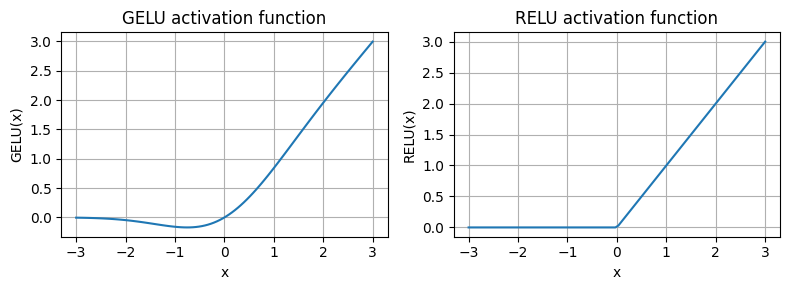

In [54]:
# GELU activation function demonstrationn and comparision with RELU activation function.

# We use GeLU activation function than ReLU in LLM because ReLU ignore negative values and take only maximum value
# GeLU take both negative and positive values and give output. This is demonstrated below using a graph.

import matplotlib.pyplot as plt

class GELU(nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(torch.sqrt(torch.tensor(2.0/torch.pi))* (x + 0.044715 * torch.pow(x, 3))))
    
gelu, relu = GELU(), nn.ReLU()
x = torch.linspace(-3, 3, 100)
y_gelu, y_relu = gelu(x), relu(x)

plt.figure(figsize=(8,3))
for i, (y, label) in enumerate(zip([y_gelu, y_relu], ["GELU", "RELU"]),1):
    plt.subplot(1,2,i)
    plt.plot(x,y)
    plt.title(f"{label} activation function")
    plt.xlabel("x")
    plt.ylabel(f"{label}(x)")
    plt.grid(True)
plt.tight_layout()
plt.show()

In [55]:
# Implementation of Feed forward neural network

class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layer = nn.Sequential(  # Structure of feedforward neural network is linear -> GeLU -> Linear
            nn.Linear(cfg["emb_dim"], 4*cfg["emb_dim"]), # Using GPT configuration for FeedForward neural network
            GELU(),
            nn.Linear(4*cfg["emb_dim"],cfg["emb_dim"]),
        )

    def forward(self, x):
        return self.layer(x)
    
ff = FeedForward(GPT_Config_124m)
x = torch.randn(2,3,768)
out_ff = ff(x)
print("Shape of output : \n",out_ff.shape,"\n")
print("Output : \n", out_ff)

Shape of output : 
 torch.Size([2, 3, 768]) 

Output : 
 tensor([[[-0.3731, -0.2161,  0.1972,  ..., -0.2462,  0.0535,  0.2413],
         [ 0.0069,  0.0609,  0.3952,  ...,  0.1626, -0.0415, -0.1237],
         [ 0.1569, -0.1565, -0.0789,  ..., -0.3007,  0.2389, -0.1702]],

        [[ 0.2887,  0.0783,  0.1038,  ..., -0.2605, -0.0504, -0.2268],
         [-0.0889,  0.2274,  0.0563,  ..., -0.2062,  0.0148, -0.2420],
         [ 0.2520, -0.0005, -0.2848,  ..., -0.0739, -0.0354,  0.0410]]],
       grad_fn=<ViewBackward0>)


In [56]:
# Shortcut Connection implementation

class ExamplDeepNeuralNetwork(nn.Module):
    def __init__(self, layer_size, use_shortcut):
        super().__init__()
        self.use_shortcut = use_shortcut
        self.layers = nn.ModuleList([
            nn.Sequential(nn.Linear(layer_size[0], layer_size[1]), GELU()),
            nn.Sequential(nn.Linear(layer_size[1], layer_size[2]), GELU()),
            nn.Sequential(nn.Linear(layer_size[2], layer_size[3]), GELU()),
            nn.Sequential(nn.Linear(layer_size[3], layer_size[4]), GELU()),
            nn.Sequential(nn.Linear(layer_size[4], layer_size[5]), GELU())
        ])

    def forward(self, x):
        for layer in self.layers:
            layer_out = layer(x) # Compute output of the current layer
            if self.use_shortcut and x.shape == layer_out.shape: # Checks whether shortcut can be applied
                x = x + layer_out
            else:
                x = layer_out
        return x
    
layer_size = [3,3,3,3,3,1]
sample_input = torch.tensor([[1.,0.,-1.]])
torch.manual_seed(123)
model_without_shorcut = ExamplDeepNeuralNetwork(layer_size, use_shortcut=False)
torch.manual_seed(123) # It is used for every class instance
model_with_shorcut = ExamplDeepNeuralNetwork(layer_size, use_shortcut=True)

def print_gradient(model, x):
    output = model(x)
    target = torch.tensor([[0.]])

    # Calculate loss to find how close the output and the target
    
    loss = nn.MSELoss()
    loss = loss(output, target)

    loss.backward()

    for name, param in model.named_parameters():
        if 'weight' in name:
            print(f"{name} has gradient mean of {param.grad.abs().mean().item()} ")
print(print_gradient(model_without_shorcut,sample_input),"\n")
print(print_gradient(model_with_shorcut, sample_input))

# This the demonstratipon for shortcut connection which keeps the gradient to flow without gradient vanishing

layers.0.0.weight has gradient mean of 0.00020173587836325169 
layers.1.0.weight has gradient mean of 0.0001201116101583466 
layers.2.0.weight has gradient mean of 0.0007152041653171182 
layers.3.0.weight has gradient mean of 0.001398873864673078 
layers.4.0.weight has gradient mean of 0.005049646366387606 
None 

layers.0.0.weight has gradient mean of 0.2216978669166565 
layers.1.0.weight has gradient mean of 0.20694100856781006 
layers.2.0.weight has gradient mean of 0.3289698660373688 
layers.3.0.weight has gradient mean of 0.2665731906890869 
layers.4.0.weight has gradient mean of 1.3258538246154785 
None


In [57]:
# Complete Transformer Block Implementation

GPT_Config_124m = {
    "vocab_size" : 50257,
    "context_length" : 1024,
    "emb_dim" : 768,    # Embedding Dimension
    "n_heads" : 12,  # Numbers of attention head
    "n_layers" : 12,    # Number of layers
    "drop_rate" : 0.1,
    "qkv_bias" : False
}

class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))

    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased = False)
        norm_x = (x-mean)/torch.sqrt(var + self.eps)
        return self.scale * norm_x + self.shift

class GELU(nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(torch.sqrt(torch.tensor(2.0/torch.pi))* (x + 0.044715 * torch.pow(x, 3))))
 
class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layer = nn.Sequential(  # Structure of feedforward neural network is linear -> GeLU -> Linear
            nn.Linear(cfg["emb_dim"], 4*cfg["emb_dim"]), # Using GPT configuration for FeedForward NN  This line is Expansion layer of feedforward NN
            GELU(),
            nn.Linear(4*cfg["emb_dim"],cfg["emb_dim"]), # This line is contraction layer of FeedForward NN
        )

    def forward(self, x):
        return self.layer(x)
    
# Implementation of Multi head attention mechanism with weight split

class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_head, qkv_bias = False):
        super().__init__()
        assert(d_out % num_head == 0),\
            "d_out must be divisible by num_head"
        self.d_out = d_out
        self.num_head = num_head
        self.head_dim = d_out//num_head # Reduce the production dim to match the desire output dim
        self.w_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.w_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.w_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_in,d_out) # linear projection
        self.dropout = nn.Dropout(dropout)
        self.register_buffer('mask', torch.triu(torch.ones(context_length, context_length),diagonal=1))
        
    def forward(self, x):
        b, num_token, d_in = x.shape
        key =  self.w_key(x)    
        query = self.w_query(x)
        value = self.w_value(x) 

        # We implicity split the matrix by adding a num_head dimension 
        # unroll last dim : (b, num_token, d_out) -> (b, num_token, num_head, head_dim)
        key = key.view(b, num_token, self.num_head, self.head_dim)
        value = value.view(b, num_token, self.num_head, self.head_dim)
        query = query.view(b, num_token, self.num_head, self.head_dim)

        # Transpose: (b, num_token, num_head, head_dim) -> (b, num_head, num_token, head_dim)
        key = key.transpose(1,2)
        query = query.transpose(1,2)
        value = value.transpose(1,2)

        # Compute scaled dot product attention aka self attention with causal mask
        attention_score = query @ key.transpose(2,3)

        # original mask truncated to the number of tokens and convert to boolean 
        mask_bool = self.mask.bool()[:num_token, :num_token]

        attention_score.masked_fill(mask_bool, -torch.inf) # masking the attention score

        attention_weight = torch.softmax(attention_score/key.shape[-1]**0.5, dim = -1)
        attention_weight = self.dropout(attention_weight)

        context_vector_multihead = (attention_weight @ value).transpose(1,2)

        # Combine head, where self.d_out = self.num_head * self.head_dim
        context_vector_multihead = context_vector_multihead.contiguous().view(b, num_token, self.d_out)
        context_vector_multihead = self.out_proj(context_vector_multihead) # Optional projection

        return context_vector_multihead

# Now let us implement the entire transformer block.....

class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.attention = MultiHeadAttention(
            d_in=cfg["emb_dim"],
            d_out=cfg["emb_dim"],
            context_length=cfg["context_length"],
            num_head=cfg["n_heads"],
            dropout=cfg["drop_rate"],
            qkv_bias=cfg["qkv_bias"]
        )
        self.ff = FeedForward(cfg)
        self.norm1 = LayerNorm(cfg["emb_dim"])
        self.norm2 = LayerNorm(cfg["emb_dim"])
        self.drop_shortcut = nn.Dropout(cfg["drop_rate"])

    def forward(self, x):

        # Shortcut Connection for attention block

        shortcut = x
        x = self.norm1(x)
        x = self.attention(x)
        x = self.drop_shortcut(x)
        x = x + shortcut

        # Shortcut connection for FeedForward NN

        shortcut = x
        x = self.norm2(x)
        x = self.ff(x)
        self.drop_shortcut(x)
        x = x + shortcut
        return x

torch.manual_seed(123)
x = torch.rand(2, 4, 768)
block = TransformerBlock(GPT_Config_124m)
output = block(x)
print("Output Shape : \n", output.shape,"\n")
print("Output : \n", output, "\n")

Output Shape : 
 torch.Size([2, 4, 768]) 

Output : 
 tensor([[[ 0.1698,  0.1784,  0.2471,  ...,  0.8822,  0.4130,  0.5059],
         [-0.0217, -0.0910,  0.1543,  ...,  0.5084,  0.5222,  0.5250],
         [ 0.4345,  0.3351, -0.0045,  ...,  1.0532,  0.3839,  0.7335],
         [ 0.0626,  0.7235,  0.8617,  ...,  0.4536,  0.7321,  0.6908]],

        [[ 0.6442,  0.8567,  0.7715,  ...,  0.2118,  0.1566,  0.0600],
         [-0.0574,  0.4658,  0.2350,  ...,  0.1011,  0.5168,  0.1547],
         [ 0.8730,  0.4320,  0.0860,  ...,  0.4330,  0.5711,  0.1511],
         [ 0.4679,  0.5837,  0.4073,  ...,  1.1564,  1.2291,  0.1967]]],
       grad_fn=<AddBackward0>) 



In [58]:
# Implementation of 124M version of GPT-2

class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])

        self.trf_blocks = nn.Sequential(*[TransformerBlock(cfg) for _ in range(cfg["n_layers"])])

        self.final_norm = LayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(cfg["emb_dim"], cfg["vocab_size"], bias=False)
    
    
    def forward(self, in_index):
        batch_size, seq_len = in_index.shape
        tok_embeds = self.tok_emb(in_index)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_index.device))
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x) 
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

GPT_Config_124m = {
    "vocab_size" : 50257,
    "context_length" : 1024,
    "emb_dim" : 768,    # Embedding Dimension
    "n_heads" : 12,  # Numbers of attention head
    "n_layers" : 12,    # Number of layers
    "drop_rate" : 0.1,
    "qkv_bias" : False
}

tokenizer = tiktoken.get_encoding("gpt2")
batch = []
text1  = "Every efforts moves you"
text2 = "Every day holds a"
batch.append(torch.tensor(tokenizer.encode(text1)))
batch.append(torch.tensor(tokenizer.encode(text2)))
batch = torch.stack(batch, dim=0)
print("batch size : \n", batch, "\n")

torch.manual_seed(123)
gptmodel = GPTModel(GPT_Config_124m)
out = gptmodel(batch)
print("Output shape : \n", out.shape,"\n")
print("Logits : \n", out, "\n")

batch size : 
 tensor([[6109, 4040, 6100,  345],
        [6109, 1110, 6622,  257]]) 



Output shape : 
 torch.Size([2, 4, 50257]) 

Logits : 
 tensor([[[ 0.5167, -0.0350, -0.2424,  ...,  0.1139,  0.1244, -0.2865],
         [ 1.3569, -0.5268,  0.0245,  ..., -0.1971,  0.2882,  0.1781],
         [ 1.2166, -0.1139, -0.2749,  ...,  0.0964, -0.5610, -0.2167],
         [-0.8211,  0.3125, -0.2892,  ...,  0.5673,  0.3373,  0.2216]],

        [[-0.4464, -0.1647, -0.1758,  ...,  0.3376,  0.1688, -0.2383],
         [ 0.2094,  0.3176, -0.1318,  ...,  0.6261,  0.0143,  0.5881],
         [ 1.1166,  0.6801, -0.3057,  ...,  0.8567,  0.2679, -0.3500],
         [ 0.0117,  0.3627,  0.2767,  ...,  1.2365, -0.0898, -0.0242]]],
       grad_fn=<UnsafeViewBackward0>) 



In [59]:
def generate_text(model, idx, max_new_token, context_size):
    # idx is (batch, n_tokens)

    for _ in range(max_new_token):

        # Crop current context if it exceeds the supported context size

        idx_cond = idx[:, -context_size:]

        # Get predictions

        with torch.no_grad():
            logits = model(idx_cond)
        
        # Focus only on last time step (batch, n_tokens, vocab_size) ---> (batch, vocab_size)

        logits = logits[:, -1,:]

        # Apply softmax to get probabilities

        probab = torch.softmax(logits, dim=-1)

        # Get the idx of vocab entry with highest probability

        idx_next = torch.argmax(probab, dim=-1, keepdim=True)

        # Append sampled index to the running sequence

        idx = torch.cat((idx, idx_next), dim=1)

    return idx

start_context = "Hello, I am"
encoded = tokenizer.encode(start_context)
print("encoded : ", encoded)
encoded_tensor = torch.tensor(encoded).unsqueeze(0)
print("Ecoded tensor shape : ", encoded_tensor.shape,"\n")
print("Encoded Tensor :\n", encoded_tensor,"\n")

model.eval()
out = generate_text(model=model, idx=encoded_tensor, max_new_token=6, context_size=GPT_Config_124m["context_length"])
print("Output :", out)
print("Output Length : ", len(out[0]),"\n")

decoded_text = tokenizer.decode(out.squeeze(0).tolist())
print(decoded_text)

encoded :  [15496, 11, 314, 716]
Ecoded tensor shape :  torch.Size([1, 4]) 

Encoded Tensor :
 tensor([[15496,    11,   314,   716]]) 



Output : tensor([[15496,    11,   314,   716, 12170, 44251, 25952, 49216, 30322,  6868]])
Output Length :  10 

Hello, I am drone Omni SSLmyra muc native


In [60]:
import torch
import tiktoken

def text_to_token(text, tokenizer):
    encoded = tokenizer.encode(text, allowed_special={'<|endoftext|>'})
    encoded_tensor = torch.tensor(encoded, dtype=torch.long).unsqueeze(0)  # FIXED: add batch dimension
    return encoded_tensor

def token_to_text(token_ids, tokenizer):
    return tokenizer.decode(token_ids.squeeze(0).tolist())  # FIXED: flatten properly

start_context = "Every efforts moves you"
tokenizer = tiktoken.get_encoding("gpt2")

token_ids = generate_text(
    model=model, 
    idx=text_to_token(start_context, tokenizer), 
    max_new_token=10, 
    context_size=GPT_Config_124m["context_length"]
)

print("output text:\n", token_to_text(token_ids, tokenizer))


output text:
 Every efforts moves you horizontRoomki laserutfucks Levels Nice Sir dentist


In [61]:
input = torch.tensor([[16833, 3626, 6100],
                      [40, 1107, 588]])

target = torch.tensor([[3626, 6100, 345],
                      [1107, 588, 11311]])

with torch.no_grad():
    logits = model(input)

probab = torch.softmax(logits, dim=-1)
print(probab.shape)

token_ids = torch.argmax(probab, dim=-1, keepdim=True)
print("Token ID: \n", token_ids, "\n")

# Cross ENtropy Loss

text_idx = 0
target_probab_1 = probab[text_idx, [0,1,2], target[text_idx]]
print("Text 1:", target_probab_1,"\n")

text_idx = 1
target_probab_2 = probab[text_idx, [0,1,2], target[text_idx]]
print("Text 2:", target_probab_2)

log_probab = torch.log(torch.cat((target_probab_1,target_probab_2))) # Taking log
print(log_probab)

avg_log_probab = torch.mean(log_probab) # taking Average
print(avg_log_probab)

neg_avg_log_probab = avg_log_probab * -1
print(neg_avg_log_probab)

print("Logits shape :", logits.shape)
print("target shape :", target.shape)

logit_flatten = logits.flatten(0,1)
target_flat = target.flatten()

print("Flattened logits :", logit_flatten.shape)
print("Flattened target :", target_flat.shape)

# Main cross entropy 

loss = torch.nn.functional.cross_entropy(logit_flatten, target_flat)
print("loss : ", loss)

perplexity = torch.exp(loss)
print("perplexity :", perplexity)


torch.Size([2, 3, 50257])
Token ID: 
 tensor([[[25388],
         [41068],
         [49272]],

        [[ 2109],
         [ 3957],
         [30269]]]) 

Text 1: tensor([4.8134e-06, 5.9264e-06, 3.4793e-06]) 

Text 2: tensor([1.2831e-05, 2.4681e-05, 1.0381e-05])


tensor([-12.2441, -12.0361, -12.5687, -11.2636, -10.6095, -11.4755])
tensor(-11.6996)
tensor(11.6996)
Logits shape : torch.Size([2, 3, 50257])
target shape : torch.Size([2, 3])
Flattened logits : torch.Size([6, 50257])
Flattened target : torch.Size([6])
loss :  tensor(11.6996)
perplexity : tensor(120521.5703)


In [62]:
import tiktoken

tokenizer = tiktoken.get_encoding("gpt2")

with open("the-verdict.txt" , 'r') as file:
    data = file.read()
# print(data)
total_character = len(data)
total_token = len(tokenizer.encode(data))
print(total_character)
print(total_token)

20479
5145


In [69]:
# Creating a input output pair

from torch.utils.data import Dataset, DataLoader
import torch

class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_len, stride):
        self.input_ids = []
        self.target_ids = []

        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})
    # Using sliding window to chuck block into overlapping sequence of max_len 
        for i in range (0, len(token_ids)-max_len, stride):
            input_chuck = token_ids[i : i + max_len]
            target_chuck = token_ids[i + 1 : i + max_len + 1]
            self.input_ids.append(torch.tensor(input_chuck))
            self.target_ids.append(torch.tensor(target_chuck))

    def __len__(self):
        return len(self.input_ids)
    
    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]
    

def create_dataloader(txt, batch_size = 4, max_len = 256, stride = 128, shuffle = True, drop_last = True, num_workers = 0):
    dataset = GPTDatasetV1(txt, tokenizer, max_len, stride) #create dataset
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle = shuffle, drop_last = drop_last, num_workers = num_workers)
    return dataloader

train_ratio = 0.80
split_text = int(train_ratio * len(data))
train_data = data[: split_text]
val_data = data[split_text :]

torch.manual_seed(123)

train_dataloader = create_dataloader(
    data, batch_size=2, 
    max_len=GPT_Config_124m["context_length"], 
    stride=GPT_Config_124m["context_length"],
    drop_last = True,
    shuffle = True, 
    num_workers=0
    )

val_data_loader = create_dataloader(
    data, batch_size=2, 
    max_len=GPT_Config_124m["context_length"], 
    stride=GPT_Config_124m["context_length"],
    drop_last = False,
    shuffle = False, 
    num_workers=0
    )

if total_token * (train_ratio) < GPT_Config_124m["context_length"]:
    print("Try to increase the training_ratio ")
if total_token * (1 - train_ratio) < GPT_Config_124m["context_length"]:
    print("Try to decrease the training_ratio ")

torch.manual_seed(123)
model = GPTModel(GPT_Config_124m)

def cal_loss_batch(input_batch, target_batch, model, device):
    input_batch, target_batch = input_batch.to(device), target_batch.to(device)
    logits = model(input_batch)
    loss = torch.nn.functional.cross_entropy(logits.flatten(0,1), target_batch.flatten())
    return loss

def cal_loss_loader(data_loader, model, device, num_batches = None):
    total_loss = 0.
    if len(train_dataloader) == 0:
        return float("nan")
    elif num_batches is None:
        num_batches = len(train_dataloader)
    else:
        num_batches = min(num_batches, len(train_dataloader))
    
    for i, (input_batch, target_batch) in enumerate(train_dataloader):
        if i < num_batches:
            loss = cal_loss_batch(input_batch, target_batch, model, device)
            total_loss += loss.item()
        else:
            break
    return total_loss/num_batches

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

torch.manual_seed(123)
with torch.no_grad():
    train_loss = cal_loss_loader(train_dataloader, model, device)
    val_loss = cal_loss_loader(val_data_loader, model, device)

print("Training loss :", train_loss, "\n")
print("Validation loss :", val_loss)

Training loss : 10.998909950256348 

Validation loss : 11.013081550598145


In [ ]:
def train_model_simple(model, train_dataloader, val_data_loader, optimizer, device, num_epoch, 
                       eval_freq, eval_iter, start_context, tokenizer):
    train_losses, val_losses, track_tokens_seen = [], [], []
    tokens_seen , global_step = 0, -1

    # Main training loop
    for epoch in range(num_epoch):
        model.train()

        for input_batch, target_batch in train_dataloader:
            optimizer.zero_grad()
            loss = cal_loss_batch(input_batch, target_batch, model, device)
            loss.backward()
            optimizer.step()
            tokens_seen += input_batch.numel()
            global_step += 1

            # Optional Evalution step

            if global_step % eval_freq == 0:
                train_loss, val_loss = evaluate_model(model, train_dataloader, val_data_loader, device, eval_iter)
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                track_tokens_seen.append(tokens_seen)
                print(f"Ep {epoch+1} (step{global_step:06d}): "
                      f"Train loss {train_loss:.3f}, Validation loss {val_loss:.3f}")
                
        generate_and_print(model, tokenizer, device, start_context)
    return train_losses, val_losses, track_tokens_seen

def evaluate_model(model, train_dataloader, val_data_loader, device, eval_iter):
    model.eval()
    with torch.no_grad():
        train_loss = cal_loss_loader(train_dataloader, model, device, num_batches=eval_iter)
        val_loss = cal_loss_loader(val_data_loader, model, device, num_batches=eval_iter)
    model.train()
    return train_loss, val_loss

def generate_and_print(model, tokenizer, device, start_context):
    model.eval()
    context_size = model.pos_emb.weight.shape[0]
    encoded = text_to_token(start_context, tokenizer).to(device)
    with torch.no_grad():
        token_id = generate_text(model=model, idx=encoded, max_new_token=50, context_size=context_size)
    decoded_text = token_to_text(token_id,tokenizer)
    print(decoded_text.replace("\n", " ")) 

import time

start_time = time.time()

torch.manual_seed(123)
model = GPTModel(GPT_Config_124m)
model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0004, weight_decay=0.1)

num_epoch = 10
train_losses, val_losses, token_seen = train_model_simple(
    model, train_dataloader, 
    val_data_loader, optimizer, 
    device, num_epoch=num_epoch, 
    eval_freq=5, 
    eval_iter=5, 
    start_context="Every efforts moves you", tokenizer=tokenizer
    )

end_time = time.time()
execution_time = (end_time - start_time) / 60
print(f"Training completed in {execution_time:.2f} min")